In [1]:
%matplotlib inline

import matplotlib
import numpy as np
from numpy.random import rand
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

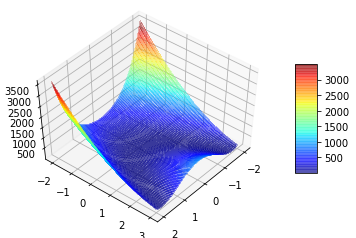

In [33]:
def rosenbrock(x, y):
    return (1.-x)**2 + 100.*(y-x*x)**2

def rastrigin(x, y):
    return 20+x**2-10*np.cos(2*np.pi*x)+y**2-10*np.cos(2*np.pi*y)

def plot(f, points = None, name = None):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    s = 0.05
    X = np.arange(-2, 2.+s, s)
    Y = np.arange(-2, 3.+s, s)
    X, Y = np.meshgrid(X, Y)
    Z=f(X, Y)

    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False, alpha=0.3)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    if points:
        ax.scatter(*points, f(*points), c="red")
    
    ax.view_init(elev=50, azim=40)
    if name:
        fig.savefig(name, dpi=300)
        plt.close()

plot(rosenbrock)

### Parameters :
a, b, c = learning constants between 0 and 1  
R = random number between 0 and 1  
v_p = velocity within the landscape  
s_p = location within the landscape  
s_pbest = previous best location  
s_gbest = global best location  

a : keep original direction
b : go towards personal best
c : go towards global best

Overall Average Improvement : 637.3168820021331


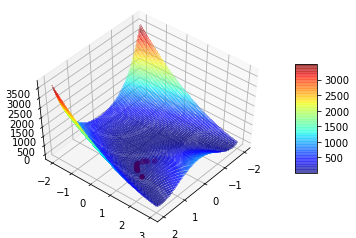

In [35]:
def simulate(f, save_images):
    a, b, c = 1, 1, 1
    # Particle Starting Positions
    X = np.arange(-2, 2, 1)
    Y = np.arange(-2, 3, 1)
    X, Y = np.meshgrid(X, Y)
    Vdx = np.ones(X.shape)  # Velocity Direction
    Vdy = np.ones(X.shape)  # Velocity Direction
    Sx = np.zeros(X.shape)  # Best personal X
    Sy = np.zeros(X.shape)  # Best personal Y
    Sv = np.full(X.shape, 100)  # Best personal value
    original = f(X, Y)
    iterations = 100
    best = None
    for it in range(iterations):
        a = (iterations-it)/iterations
        b = 0.3
        c = it/iterations
        if f is rastrigin and best is not None and f(X[best],Y[best]) < 0.1:
            a = 0
            b = 0
            c = 1

        # Move according to velocity
        Vs = 0.1
        original_round = np.average(f(X, Y))
        X, Y = X+Vdx*Vs, Y+Vdy*Vs
        new_round = np.average(f(X, Y))
        # Determine personal best position
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                fitness = f(X[i, j],Y[i, j])
                if fitness <= Sv[i, j]:
                    Sv[i, j], Sx[i, j], Sy[i, j] = fitness, X[i, j], Y[i, j]
                    #print("Fitness for {}/{} updated to {}".format(i, j, fitness))
        # Global best position
        best = np.argmin(f(X, Y))
        best = np.unravel_index(best, X.shape)
        #print("{} Global Best : {:.2f} Average Improvement : {:.2f}".format(it, f(X[best], Y[best]), original_round - new_round))
        # Determine new velocity
        nVdx = a*Vdx+b*(Sx-X)+c*(X[best]-X)
        nVdy = a*Vdy+b*(Sy-Y)+c*(Y[best]-Y)
        Vdx = np.clip(nVdx, -1, 1)
        Vdy = np.clip(nVdy, -1, 1)
        if it % 5 == 0 and save_images:
            plot(f, (X, Y), "image_{:d}.png".format(it//5))
    final = f(X, Y)
    print("Overall Average Improvement : {}".format(np.average(original-final)))
    plot(f, (X, Y))

         
simulate(rosenbrock, True)

            